In [1]:
hydropathy_scale = {
    "A": 1.8,
    "C": 2.5,
    "D": -3.5,
    "E": -3.5,
    "F": 2.8,
    "G": -0.4,
    "H": -3.2,
    "I": 4.5,
    "K": -3.9,
    "L": 3.8,
    "M": 1.9,
    "N": -3.5,
    "P": -1.6,
    "Q": -3.5,
    "R": -4.5,
    "S": -0.8,
    "T": -0.7,
    "V": 4.2,
    "W": -0.9,
    "Y": -1.3
}

In [48]:
import matplotlib.pyplot as plt

def naive_hydropathy(seq, window):
    hydropathy = []
    idx = []
    if len(seq) < window:
        return (idx, hydropathy)
    else:
        start = 0
        end = window
        hydropathy_sum = 0
        for x in seq[start:window]:
            hydropathy_sum += hydropathy_scale[x]
        hydropathy.append(hydropathy_sum/window)
        idx.append((start+end)/2)
        start += 1
        end += 1
        while end <= len(seq):
            hydropathy_sum -= hydropathy_scale[seq[start-1]]
            hydropathy_sum += hydropathy_scale[seq[end-1]]
            hydropathy.append(hydropathy_sum/window)
            idx.append((start+end)/2)
            start += 1
            end += 1
        return (idx, hydropathy)
    
def plot_hydropathy(seq, window):
    hp = naive_hydropathy(seq, window)
    plt.plot(hp[0], hp[1], linewidth=1)

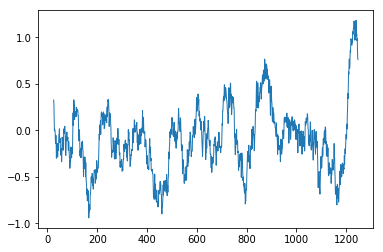

In [53]:
from Bio import SeqIO

for record in SeqIO.parse("P0DTC2.fasta", "fasta"):
    plot_hydropathy(record.seq, 50)